In [1]:
cd /Users/pldelacour/Documents/PL_Ecole/data_sc_lab/data_sc_lab/task_01/pipelines

[Errno 2] No such file or directory: '/Users/pldelacour/Documents/PL_Ecole/data_sc_lab/data_sc_lab/task_01/pipelines'
/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_01/methods


In [1]:
cd ../pipelines

/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_01/pipelines


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.tool_functions import *
from yellowbrick.regressor import AlphaSelection

Using TensorFlow backend.


In [3]:
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')#, nrows=1000)

df_psd_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv") #, nrows=1000)
df_psd_channel = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Channel.csv") #, nrows=5)
df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv") #, nrows=1000)
df_spectro_channel = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Channel.csv") #, nrows=5)

df_microstate = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv") #, nrows=5)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103

In [4]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "DX_01_Cat"]]
y_labels_healthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == True]

y_labels = y_labels[["Patient_ID", "Age"]]
y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]
y_labels_healthy

,Patient_ID,Age
9,NDARCF462HNM,14.216632
11,NDARFC233RND,9.153661
22,NDARDT800YVF,17.510381
25,NDARZT011LBZ,7.760209
26,NDARKV482FU9,10.977298
...,...,...
2088,NDARAV069HGT,13.896189
2089,NDARZC497BFU,17.419917
2090,NDARDZ737LG9,13.031143
2094,NDARRT283RHB,10.712069


In [5]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)
print("Original lengths: " + str(len(df_psd_cluster)) + "(psd), " + \
     str(len(df_spectro_cluster)) + "(spectro), " + str(len(df_microstate)) + "(micro)")

# Aggregate with label
df_label_psd_cluster = pd.merge(y_labels_healthy, df_psd_cluster, on='Patient_ID')
df_label_spectro_cluster = pd.merge(y_labels_healthy, df_spectro_cluster, on='Patient_ID')
df_label_microstate = pd.merge(y_labels_healthy, df_microstate, on='Patient_ID')
print("Only healthy people, resulting lengths: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

# Drop NaN values
df_label_psd_cluster = fill_with_median(df_label_psd_cluster)
df_label_spectro_cluster = fill_with_median(df_label_spectro_cluster)
df_label_microstate = fill_with_median(df_label_microstate)
print("Replace NaN by median, resulting lenghts: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

Original lengths: 1485(psd), 1485(spectro), 1108(micro)
Only healthy people, resulting lengths: 174(psd), 174(spectro), 128(micro)
Replace NaN by median, resulting lenghts: 174(psd), 174(spectro), 128(micro)


In [6]:
test_ratio = 0.2

In [7]:
# Define Train and Test data 
print()
print("---- Split into Train and Test data ----")
print()
(X_train_psd, y_train_psd, X_test_psd, y_test_psd) = \
                                                    train_test_split(df_label_psd_cluster, test_ratio)
(X_train_spe, y_train_spe, X_test_spe, y_test_spe) = \
                                                    train_test_split(df_label_spectro_cluster, test_ratio)
(X_train_mic, y_train_mic, X_test_mic, y_test_mic) = \
                                                    train_test_split(df_label_microstate, test_ratio)

print("Test lengths: " + str(len(y_test_psd)) + "(psd), " + \
     str(len(y_test_spe)) + "(spectro), " + str(len(y_test_mic)) + "(micro)")

# Feature selection by correlation
print()
print("---- Feature selection by correlation ----")
print()



---- Split into Train and Test data ----

Test lengths: 34(psd), 34(spectro), 25(micro)

---- Feature selection by correlation ----



In [11]:
#alphas = np.logspace(1,-10 , 100)
#alphas = np.logspace(-4, -0.5, 30)
#alphas

In [8]:
alphas = np.logspace(-3, -2, 10)
alphas

array([0.001     , 0.00129155, 0.0016681 , 0.00215443, 0.00278256,
       0.00359381, 0.00464159, 0.00599484, 0.00774264, 0.01      ])

In [9]:
from sklearn.linear_model import LassoCV

In [10]:
x_train = X_train_psd.loc[:,X_train_psd.columns != 'Patient_ID']
y_train = y_train_psd.loc[:,y_train_psd.columns != 'Patient_ID']
x_test = X_test_psd.loc[:,X_train_psd.columns != 'Patient_ID']
y_test = y_test_psd.loc[:,y_train_psd.columns != 'Patient_ID']
#x_test.head(5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.53186978754675, tolerance: 0.12412559113995626
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.606876662943364, tolerance: 0.12412559113995626
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.312101226919552, tolerance: 0.12789081293619542
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.801356169787908, tolerance: 0.12789081293619542
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.013266271139095, tolerance: 0.12789081293619542
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.2032

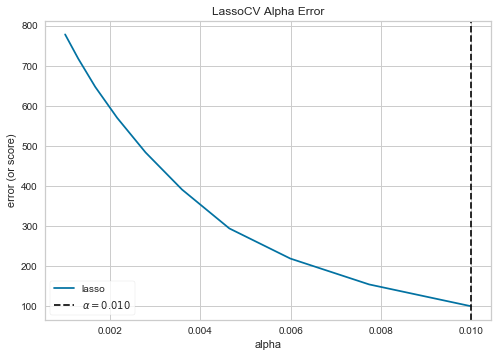

In [11]:
reg = LassoCV(cv=5, random_state=0, alphas = alphas, max_iter=3000)
#reg.fit(x_train, y_train)
visualizer = AlphaSelection(reg)
visualizer.fit(x_train, y_train)
visualizer.show()

In [12]:
#print(visualizer.alpha_)
#reg = visualizer
print("Best Alpha = ", visualizer.alpha_)
#best_alpha = reg.alpha
print("# of coef before = ", len(visualizer.coef_))
print("# of coef after = " , np.sum(visualizer.coef_!=0))
print('MSE = ' , np.mean(visualizer.mse_path_ , axis=1))


Best Alpha =  0.01
# of coef before =  2040
# of coef after =  128
MSE =  [100.10555148 154.4188349  218.94664926 294.13901786 390.96366632
 483.79684431 569.87188129 647.12232517 717.42651395 778.00012962]


In [13]:
features = visualizer.coef_!=0

In [14]:
x_train.loc[:,features].head(5)

,eyesclosed_psd_01dot00hz_mfront,eyesclosed_psd_01dot00hz_rfront,eyesclosed_psd_01dot00hz_lpari,eyesclosed_psd_01dot00hz_mpari,eyesclosed_psd_01dot00hz_rpari,eyesclosed_psd_01dot50hz_lfront,eyesclosed_psd_01dot50hz_mfront,eyesclosed_psd_01dot50hz_mpari,eyesclosed_psd_01dot50hz_rpari,eyesclosed_psd_02dot00hz_rfront,...,eyesopen_psd_10dot00hz_mpari,eyesopen_psd_10dot50hz_lfront,eyesopen_psd_10dot50hz_rpari,eyesopen_psd_11dot00hz_lfront,eyesopen_psd_11dot00hz_mpari,eyesopen_psd_12dot00hz_rpari,eyesopen_psd_12dot50hz_rpari,eyesopen_psd_14dot50hz_mpari,eyesopen_psd_28dot50hz_mpari,eyesopen_psd_33dot50hz_mpari
34,3.093369,3.532940,3.823570,5.645943,3.165222,1.982113,2.889688,4.939520,2.870843,2.346684,...,0.436062,0.173794,0.255782,0.129409,0.321147,0.153420,0.135904,0.168605,0.046417,0.037680
35,8.824072,7.856013,8.493099,9.119003,12.040098,8.269384,9.025446,9.459177,12.478681,5.762295,...,3.649563,1.300103,2.489741,0.887655,1.124435,0.729943,0.610726,0.512440,0.041118,0.029757
36,12.779590,8.482489,11.761118,25.732970,11.497741,12.278763,12.468844,25.536666,10.814782,6.501963,...,1.630101,1.044831,0.908202,0.943526,1.502082,0.585680,0.510318,0.515332,0.106396,0.095202
37,4.097884,1.494475,2.092393,5.736902,1.127765,3.505047,3.404378,4.634194,0.919095,0.811373,...,0.236685,0.089585,0.041344,0.087364,0.181349,0.029663,0.027665,0.121753,0.099719,0.116175
38,16.370740,15.084291,18.365652,20.572433,22.367883,14.457712,15.516250,20.606551,24.348495,10.220858,...,2.571540,1.648308,3.896273,1.550827,2.465413,2.715528,2.355627,0.724543,0.278544,0.050496


In [15]:
x_train_extract = x_train.loc[:,features]
x_test_extract = x_test.loc[:,features]


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression().fit(x_train_extract, y_train)
reg.score(x_test_extract , y_test)

-66.77875135153363

In [18]:
mse = np.mean((reg.predict(x_test_extract) - y_test)**2)
mse


Age    738.892498
dtype: float64

## Compare with average baseline

In [19]:

mean = np.mean((np.mean(y_train) - y_test)**2)
median = np.mean((np.median(y_train) - y_test)**2)
print("Mean = " , mean[0] )
print('Median = ' , median[0])

Mean =  11.290413743421546
Median =  12.972380931427482


## Gaussian Process


In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [21]:
from sklearn.gaussian_process.kernels import RBF , DotProduct, Matern

In [200]:
lengthscale = np.linspace(0.1,1, num = 5)
lengthscale
sigma_0 = np.linspace(0,2 , num = 5)
sigma_0

array([0. , 0.5, 1. , 1.5, 2. ])

In [201]:
gp = GaussianProcessRegressor()
tuple_kernel = list()
for i in range(len(lengthscale)):
    for j in range(len(sigma_0)):
        tuple_kernel.append(RBF(length_scale = lengthscale[i]) + DotProduct(sigma_0 = sigma_0[j]))

tuple_kernel = tuple(tuple_kernel)
parameters = {'kernel' : tuple_kernel, 'alpha':[0.01,0.1,1,10]}
gp_model = GridSearchCV(gp, parameters ,cv =3)
gp_model.fit(x_train_extract , y_train)

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:255

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=0,
                                                normalize_y=False,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'kernel': (RBF(length_scale=0.1) + DotProduct(sigma_0=0),
                                    RBF(length_scale=0.1) + DotProduct(s...
                                    RBF(length_scale=0.775) + DotProduct(sigma_0=1.5),
                                    RBF(length_scale=0.775) + DotProduct(sigma_0=2),
                                    RBF(length_scale=1) + DotProduct(sigma_0=0),
                               

In [202]:
print("Best score = " , gp_model.best_score_)
print('Best param ' , gp_model.best_params_)
gp_model.best_estimator_
best_param_gp = gp_model.best_params_

Best score =  0.45157904568933277
Best param  {'alpha': 10, 'kernel': RBF(length_scale=1) + DotProduct(sigma_0=0.5)}


In [203]:
gp_final = GaussianProcessRegressor(kernel = best_param_gp['kernel'] , alpha = best_param_gp['alpha'])
gp_final.fit(x_train_extract , y_train)
y_predicted_gp = gp_final.predict(x_test_extract)
test_mse_gp = sklearn.metrics.mean_squared_error(y_test ,y_predicted_gp)
print('Test MSE for GP = ' , test_mse_gp)

Test MSE for GP =  7.984468549719948


## SVM

In [22]:
from sklearn import svm
import sklearn

In [23]:
clf = svm.SVR()
clf.fit(x_train_extract, y_train)
sklearn.metrics.mean_squared_error(y_test , clf.predict(x_test_extract))


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


8.020125273380868

In [24]:
#cross val
from sklearn.model_selection import GridSearchCV

In [25]:
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'poly', 'linear' ), 'C':[0.1, 1,10,100]}
clf = GridSearchCV(svr, parameters ,cv =3)
clf.fit(x_train_extract , y_train)


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print(clf.best_estimator_)
best_param = clf.best_params_
print("Best score = " , clf.best_score_)
print("Best param = " , best_param)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
Best score =  0.17388375718743496
Best param =  {'C': 0.1, 'kernel': 'linear'}


In [27]:
svr_final = svm.SVR(kernel = best_param['kernel'] , C = best_param['C'])
svr_final.fit(x_train_extract , y_train)
test_mse_svm = sklearn.metrics.mean_squared_error(y_test , svr_final.predict(x_test_extract))
print('TEST MSE = ', test_mse_svm)



TEST MSE =  13.507407601289081


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
